In [1]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from shutil import copyfile
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [2]:
file_zip = 'drive/MyDrive/Dataset/picture_dataset.zip'
zip_ref = zipfile.ZipFile(file_zip, 'r')
zip_ref.extractall()
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='drive/MyDrive/Dataset/picture_dataset.zip' mode='r'>>

In [3]:
source_path = 'ingredients_images'

source_path_apple = os.path.join(source_path, 'apel')
source_path_onion = os.path.join(source_path, 'bawang merah')
source_path_garlic = os.path.join(source_path, 'bawang putih')
source_path_chili = os.path.join(source_path, 'cabai')
source_path_chicken = os.path.join(source_path, 'daging ayam mentah')
source_path_leek = os.path.join(source_path, 'daun bawang')
source_path_salt = os.path.join(source_path, 'garam dapur')
source_path_sugar = os.path.join(source_path, 'gula pasir')
source_path_corn = os.path.join(source_path, 'jagung')
source_path_ginger = os.path.join(source_path, 'jahe')
source_path_orange = os.path.join(source_path, 'jeruk')
source_path_powdered_broth = os.path.join(source_path, 'kaldu bubuk')
source_path_soy_sauce = os.path.join(source_path, 'kecap')
source_path_honey = os.path.join(source_path, 'madu')
source_path_cooking_oil = os.path.join(source_path, 'minyak goreng')
source_path_banana = os.path.join(source_path, 'pisang')
source_path_milk = os.path.join(source_path, 'susu')
source_path_tofu = os.path.join(source_path, 'tahu mentah')
source_path_egg = os.path.join(source_path, 'telur ayam')
source_path_tempeh = os.path.join(source_path, 'tempe mentah')
source_path_tomato = os.path.join(source_path, 'tomat')
source_path_carrot = os.path.join(source_path, 'wortel')


# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_apple))} images of apple.")
print(f"There are {len(os.listdir(source_path_onion))} images of onion.")
print(f"There are {len(os.listdir(source_path_garlic))} images of garlic.")
print(f"There are {len(os.listdir(source_path_chili))} images of chili.")
print(f"There are {len(os.listdir(source_path_chicken))} images of chicken.")
print(f"There are {len(os.listdir(source_path_leek))} images of leek.")
print(f"There are {len(os.listdir(source_path_salt))} images of salt.")
print(f"There are {len(os.listdir(source_path_sugar))} images of sugar.")
print(f"There are {len(os.listdir(source_path_corn))} images of corn.")
print(f"There are {len(os.listdir(source_path_ginger))} images of ginger.")
print(f"There are {len(os.listdir(source_path_orange))} images of orange.")
print(f"There are {len(os.listdir(source_path_powdered_broth))} images of powdered broth.")
print(f"There are {len(os.listdir(source_path_soy_sauce))} images of soy sauce.")
print(f"There are {len(os.listdir(source_path_honey))} images of honey.")
print(f"There are {len(os.listdir(source_path_cooking_oil))} images of cooking oil.")
print(f"There are {len(os.listdir(source_path_banana))} images of banana.")
print(f"There are {len(os.listdir(source_path_milk))} images of milk.")
print(f"There are {len(os.listdir(source_path_tofu))} images of tofu.")
print(f"There are {len(os.listdir(source_path_egg))} images of egg.")
print(f"There are {len(os.listdir(source_path_tempeh))} images of tempeh.")
print(f"There are {len(os.listdir(source_path_tomato))} images of tomato.")
print(f"There are {len(os.listdir(source_path_carrot))} images of carrot.")

There are 120 images of apple.
There are 122 images of onion.
There are 120 images of garlic.
There are 120 images of chili.
There are 120 images of chicken.
There are 120 images of leek.
There are 120 images of salt.
There are 120 images of sugar.
There are 120 images of corn.
There are 120 images of ginger.
There are 120 images of orange.
There are 120 images of powdered broth.
There are 120 images of soy sauce.
There are 120 images of honey.
There are 120 images of cooking oil.
There are 120 images of banana.
There are 120 images of milk.
There are 120 images of tofu.
There are 120 images of egg.
There are 122 images of tempeh.
There are 120 images of tomato.
There are 120 images of carrot.


In [4]:
# Define root directory
root_dir = 'ingredients_dataset'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_test_dirs(root_path):

      try:
        train_dir = os.path.join(root_path,'training')
        testing_dir = os.path.join(root_path,'testing')
        apple_train_dir = os.path.join(train_dir,'apple')
        onion_train_dir = os.path.join(train_dir, 'onion')
        garlic_train_dir = os.path.join(train_dir, 'garlic')
        apple_test_dir = os.path.join(testing_dir, 'apple')
        onion_test_dir = os.path.join(testing_dir, 'onion')
        garlic_test_dir = os.path.join(testing_dir, 'garlic')

        os.makedirs(train_dir)
        os.makedirs(testing_dir)
        os.makedirs(apple_train_dir)
        os.makedirs(onion_train_dir)
        os.makedirs(garlic_train_dir)
        os.makedirs(apple_test_dir)
        os.makedirs(onion_test_dir)
        os.makedirs(garlic_test_dir)
      except OSError:
          pass

  
try:
  create_train_test_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")


In [5]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

ingredients_dataset/training
ingredients_dataset/testing
ingredients_dataset/training/garlic
ingredients_dataset/training/onion
ingredients_dataset/training/apple
ingredients_dataset/testing/garlic
ingredients_dataset/testing/onion
ingredients_dataset/testing/apple


In [6]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):

    files=[]
    for filename in os.listdir(SOURCE):
      file = SOURCE + filename
      if os.path.getsize(file) > 0:
        files.append(filename)
      else:
        print(filename + " is zero length, so ignoring.")
    
    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
      this_file = SOURCE + filename
      destination = TRAINING + filename
      copyfile(this_file, destination)

    for filename in testing_set:
      this_file = SOURCE + filename
      destination = TESTING + filename
      copyfile(this_file, destination)

In [7]:
APPLE_SOURCE_DIR = "ingredients_images/apel/"
ONION_SOURCE_DIR = "ingredients_images/bawang merah/"
GARLIC_SOURCE_DIR = "ingredients_images/bawang putih/"

TRAINING_DIR = "ingredients_dataset/training/"
TESTING_DIR = "ingredients_dataset/testing/"

TRAINING_APPLE_DIR = os.path.join(TRAINING_DIR, "apple/")
TESTING_APPLE_DIR = os.path.join(TESTING_DIR, "apple/")

TRAINING_ONION_DIR = os.path.join(TRAINING_DIR, "onion/")
TESTING_ONION_DIR = os.path.join(TESTING_DIR, "onion/")

TRAINING_GARLIC_DIR = os.path.join(TRAINING_DIR, "garlic/")
TESTING_GARLIC_DIR = os.path.join(TESTING_DIR, "garlic/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_APPLE_DIR)) > 0:
  for file in os.scandir(TRAINING_APPLE_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_ONION_DIR)) > 0:
  for file in os.scandir(TRAINING_ONION_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_GARLIC_DIR)) > 0:
  for file in os.scandir(TRAINING_GARLIC_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_APPLE_DIR)) > 0:
  for file in os.scandir(TESTING_APPLE_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_ONION_DIR)) > 0:
  for file in os.scandir(TRAINING_ONION_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_GARLIC_DIR)) > 0:
  for file in os.scandir(TRAINING_GARLIC_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .8

# Messages about zero length images should be printed out
split_data(APPLE_SOURCE_DIR, TRAINING_APPLE_DIR, TESTING_APPLE_DIR, split_size)
split_data(ONION_SOURCE_DIR, TRAINING_ONION_DIR, TESTING_ONION_DIR, split_size)
split_data(GARLIC_SOURCE_DIR, TRAINING_GARLIC_DIR, TESTING_GARLIC_DIR, split_size)

# Check that the number of images matches the expected output
print(f"\n\nThere are {len(os.listdir(TRAINING_APPLE_DIR))} images of apple for training")
print(f"There are {len(os.listdir(TRAINING_ONION_DIR))} images of onion for training")
print(f"There are {len(os.listdir(TRAINING_GARLIC_DIR))} images of garlic for training")
print(f"There are {len(os.listdir(TESTING_APPLE_DIR))} images of apple for testing")
print(f"There are {len(os.listdir(TESTING_ONION_DIR))} images of onion for testing")
print(f"There are {len(os.listdir(TESTING_GARLIC_DIR))} images of garlic for testing")



There are 96 images of apple for training
There are 97 images of onion for training
There are 96 images of garlic for training
There are 24 images of apple for testing
There are 25 images of onion for testing
There are 24 images of garlic for testing


In [8]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  train_datagen = ImageDataGenerator(rescale= 1.0/255.0,
                                     rotation_range= 40,
                                     width_shift_range= 0.2,
                                     height_shift_range= 0.2,
                                     shear_range= 0.2,
                                     zoom_range= 0.2,
                                     horizontal_flip= True)

  # Pass in the appropiate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory= TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale = 1./255.)

  # Pass in the appropiate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory= VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                target_size=(150, 150))
  return train_generator, validation_generator


In [9]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, TESTING_DIR)

Found 289 images belonging to 3 classes.
Found 73 images belonging to 3 classes.


In [10]:
# Download the inception v3 weights
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-05-28 09:00:28--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   253MB/s    in 0.3s    

2022-05-28 09:00:29 (253 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [11]:
# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [12]:
def create_pre_trained_model(local_weights_file):

  pre_trained_model = InceptionV3(input_shape = (150, 150, 3),
                                  include_top = False, 
                                  weights = None) 

  pre_trained_model.load_weights(local_weights_file)

  # Make all the layers in the pre-trained model non-trainable
  for layer in pre_trained_model.layers:
    layer.trainable = False

  return pre_trained_model

In [13]:
pre_trained_model = create_pre_trained_model(local_weights_file)

# Print the model summary
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [14]:
total_params = pre_trained_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in pre_trained_model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 21,802,784 total parameters in this model.
There are 0 trainable parameters in this model.


In [15]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [16]:
def output_of_last_layer(pre_trained_model):

  last_desired_layer = pre_trained_model.get_layer('mixed7')
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)

  return last_output

In [17]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 7, 7, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


In [18]:
print(f"The pretrained model has type: {type(pre_trained_model)}")

The pretrained model has type: <class 'keras.engine.functional.Functional'>


In [19]:
def create_final_model(pre_trained_model, last_output):
  # Flatten the output layer to 1 dimension
  x = layers.Flatten()(last_output)

  # Add a fully connected layer with 1024 hidden units and ReLU activation
  x = layers.Dense(1024, activation='relu')(x)
  # Add a dropout rate of 0.2
  x = layers.Dropout(0.2)(x)  
  # Add a final sigmoid layer for classification
  x = layers.Dense(3, activation='softmax')(x)        

  # Create the complete model by using the Model class
  model = Model(pre_trained_model.input, x)

  # Compile the model
  model.compile(optimizer = RMSprop(learning_rate=0.0001), 
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])
  
  return model

In [20]:
# Save the model in a variable
model = create_final_model(pre_trained_model, last_output)

# Inspect parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 47,514,531 total parameters in this model.
There are 38,539,267 trainable parameters in this model.


In [21]:
callbacks = myCallback()
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 20,
                    verbose = 2,
                    callbacks=callbacks)

Epoch 1/20
10/10 - 28s - loss: 1.7767 - accuracy: 0.5052 - val_loss: 0.5718 - val_accuracy: 0.7945 - 28s/epoch - 3s/step
Epoch 2/20
10/10 - 23s - loss: 0.7772 - accuracy: 0.6644 - val_loss: 0.5323 - val_accuracy: 0.8082 - 23s/epoch - 2s/step
Epoch 3/20
10/10 - 23s - loss: 0.5147 - accuracy: 0.8131 - val_loss: 0.4173 - val_accuracy: 0.8493 - 23s/epoch - 2s/step
Epoch 4/20
10/10 - 23s - loss: 0.4974 - accuracy: 0.8166 - val_loss: 0.4258 - val_accuracy: 0.8493 - 23s/epoch - 2s/step
Epoch 5/20
10/10 - 22s - loss: 0.5187 - accuracy: 0.7785 - val_loss: 0.3020 - val_accuracy: 0.8904 - 22s/epoch - 2s/step
Epoch 6/20
10/10 - 23s - loss: 0.4216 - accuracy: 0.8374 - val_loss: 0.5126 - val_accuracy: 0.7671 - 23s/epoch - 2s/step
Epoch 7/20
10/10 - 24s - loss: 0.3805 - accuracy: 0.8478 - val_loss: 0.3413 - val_accuracy: 0.9178 - 24s/epoch - 2s/step
Epoch 8/20
10/10 - 22s - loss: 0.3446 - accuracy: 0.8478 - val_loss: 0.2920 - val_accuracy: 0.9178 - 22s/epoch - 2s/step
Epoch 9/20
10/10 - 23s - loss: 0

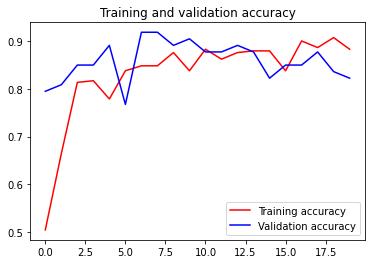

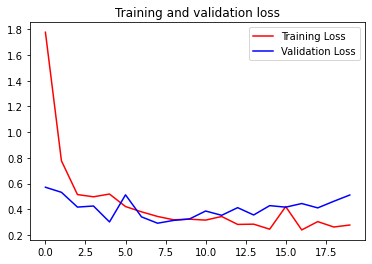

In [23]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()